In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import cdgm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for CDGM

In [2]:
catalog = 'CDGM'
gname = 'H-FK61'
gname1 = 'H-K9L'
gname2 = 'D-ZLaF85L'

In [3]:
cat_pd = cdgm.CDGMCatalog()
cat_df = cat_pd.df

In [4]:
cat_df.T

glass                                    H-FK61  H-FK61B   H-FK71    H-QK1  \
category                     data item                                       
Code                         NaN         497816   497816   457903   470669   
refractive indices           t           1.4901   1.4901  1.45072  1.46202   
                             s          1.49182  1.49182  1.45218  1.46427   
                             r          1.49407  1.49407  1.45406  1.46703   
                             C          1.49513  1.49513  1.45495  1.46829   
...                                         ...      ...      ...      ...   
dn/dt relative(10-6/℃) for g -40～-20       -5.6     -5.3     -5.2      0.3   
Melt Frequency               NaN             MA        B        C        C   
Relative price               Mass            71       71      203       64   
NaN                          Volume         105      104      292       59   
Glass                        NaN         H-FK61  H-FK61B   H-FK71    H-QK1   

glass                                    H-QK3L     H-K1     H-K2     H-K3  \
category                     data item                                       
Code                         NaN         487704   500621   500660   505647   
refractive indices           t          1.47913  1.49047  1.49143  1.49528   
                             s          1.48137  1.49282  1.49383  1.49778   
                             r          1.48411  1.49581  1.49678  1.50083   
                             C          1.48535  1.49722  1.49813  1.50222   
...                                         ...      ...      ...      ...   
dn/dt relative(10-6/℃) for g -40～-20       -1.8      0.9      3.2        3   
Melt Frequency               NaN              A        D        D        D   
Relative price               Mass            19       64       31       31   
NaN                          Volume          19       63       30       30   
Glass                        NaN         H-QK3L     H-K1     H-K2     H-K3   

glass                                       K4A     H-K5  ...  D-LaF050  \
category                     data item                    ...             
Code                         NaN         508611   510634  ...    768493   
refractive indices           t          1.49825  1.50069  ...   1.75138   
                             s          1.50079  1.50312  ...   1.75554   
                             r          1.50398  1.50618  ...   1.76106   
                             C          1.50546   1.5076  ...   1.76372   
...                                         ...      ...  ...       ...   
dn/dt relative(10-6/℃) for g -40～-20        5.5      2.4  ...       6.1   
Melt Frequency               NaN              D        D  ...         B   
Relative price               Mass            35       30  ...        96   
NaN                          Volume          34       30  ...       172   
Glass                        NaN            K4A     H-K5  ...  D-LaF050   

glass                                   D-LaF53  D-LaF79  D-LaF82L  D-ZLaF50  \
category                     data item                                         
Code                         NaN         743493   731405    735488    803455   
refractive indices           t          1.72683     <NA>   1.71834    1.7846   
                             s          1.73084     <NA>   1.72234   1.78904   
                             r          1.73619  1.72243   1.72771   1.79513   
                             C          1.73876  1.72542    1.7303   1.79809   
...                                         ...      ...       ...       ...   
dn/dt relative(10-6/℃) for g -40～-20        6.6      NaN       8.6       7.2   
Melt Frequency               NaN              B        C         D         C   
Relative price               Mass            75       81        96       126   
NaN                          Volume         126      103       155       244   
Glass                        NaN  

In [5]:
cat_df.columns.has_duplicates

False

In [6]:
cat_df.columns.levels[0]

Index(['Code', 'D0', 'D1', 'D2', 'E0', 'E1', 'Glass', 'Melt Frequency',
       'P'C',s', 'P'd,c'', 'P'e,d', 'P'g,F'', 'P's,t', 'PC,s', 'Pd,C', 'Pe,d',
       'Pg,F', 'Ps,t', 'Relative price', 'abbe number', 'chemical properties',
       'dispersion coefficients', 'dn/dt relative(10-6/℃) for C'',
       'dn/dt relative(10-6/℃) for F'', 'dn/dt relative(10-6/℃) for d',
       'dn/dt relative(10-6/℃) for e', 'dn/dt relative(10-6/℃) for g',
       'dn/dt relative(10-6/℃) for t', 'internal transmission mm, 10',
       'mechanical properties', 'nF - nC', 'nF'- nC'', 'refractive indices',
       'specific gravity', 'thermal properties', 'ΔPC,s', 'ΔPC,t', 'ΔPF,e',
       'ΔPg,F', 'λ70 /λ5', 'λ80 /λ5', 'λTK', 'τ5mm'],
      dtype='object', name='category')

In [7]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [8]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [9]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [10]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [11]:
cat_df.loc[gname]['dispersion coefficients']

data item
A0    2.216673
A1    -0.00494
A2     0.00915
A3   -0.000127
A4    0.000028
A5   -0.000001
Name: H-FK61, dtype: object

In [12]:
gla['dispersion coefficients']

data item
A0    2.216673
A1    -0.00494
A2     0.00915
A3   -0.000127
A4    0.000028
A5   -0.000001
Name: H-FK61, dtype: object

In [13]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float); coefs

array([ 2.21667349e+00, -4.93991656e-03,  9.15004725e-03, -1.26675570e-04,
        2.82434030e-05, -1.31517813e-06])

In [14]:
coefs[3]

-0.00012667557

In [15]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
2400      0.999
2200.0    0.999
2000.0    0.999
1800.0    0.999
1600.0    0.999
1400.0    0.999
1200.0    0.999
1060.0    0.999
1000.0    0.999
950.0     0.999
900.0     0.999
850.0     0.999
800.0     0.998
700.0     0.998
650.0     0.998
600.0     0.998
550.0     0.998
500.0     0.998
480.0     0.998
460.0     0.998
440.0     0.996
420.0     0.997
400.0     0.996
390.0     0.995
380.0     0.994
370.0     0.989
360.0     0.982
350.0     0.959
340.0     0.915
330.0     0.834
320.0     0.689
310.0     0.479
300.0     0.249
290.0     0.082
280.0      <NA>
Name: H-FK61, dtype: object

In [16]:
cat_df.loc[gname]['refractive indices'].array

<PandasArray>
[ 1.4901, 1.49182, 1.49407, 1.49513, 1.49543, 1.49571, 1.49694,   1.497,
 1.49845, 1.50123, 1.50157, 1.50449, 1.50719, 1.51173]
Length: 14, dtype: object

## Test factory method, create_glass

In [17]:
gla2 = create_glass(gname2, catalog)

In [18]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index(['t', 's', 'r', 'C', 'C'', 'He-Ne', 'D', 'd', 'e', 'F', 'F'', 'g', 'h',
       'i'],
      dtype='object', name='data item')

In [19]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

t: 1.83192,  1.831921,  6.1e-07
s: 1.83694,  1.836938, -2.1e-06
r: 1.84398,  1.843979, -6.7e-07
C: 1.84746,  1.847455, -4.7e-06
C': 1.84844,  1.848439, -1.3e-06
He-Ne: 1.84936,  1.849362,  1.5e-06
D: 1.85351,  1.853516,  6.5e-06
d: 1.8537,  1.853702,  1.6e-06
e: 1.85869,  1.858698,  7.7e-06
F: 1.8685,  1.868483, -1.7e-05
F': 1.86972,  1.869719, -7.4e-07
g: 1.88043,  1.880434,  3.5e-06
h: 1.8906,  1.890610,    1e-05
i: 1.90851,  1.908503,   -7e-06


In [20]:
gla2.meas_rindex(wvls).array

<PandasArray>
[1.83192, 1.83694, 1.84398, 1.84746, 1.84844, 1.84936, 1.85351,  1.8537,
 1.85869,  1.8685, 1.86972, 1.88043,  1.8906, 1.90851]
Length: 14, dtype: object

In [21]:
gla2.rindex(wvls)

array([1.83192061, 1.83693792, 1.84397933, 1.8474553 , 1.84843874,
       1.84936152, 1.85351646, 1.85370157, 1.85869767, 1.86848308,
       1.86971926, 1.8804335 , 1.89061007, 1.90850299])

In [22]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[ -6.098153100264625e-07,   2.075314018412655e-06,   6.741762670348095e-07,
    4.69934306956965e-06,  1.2569466969480914e-06, -1.5224706395589038e-06,
  -6.463067201645245e-06,  -1.565882748133518e-06,  -7.670761947187188e-06,
  1.6919038720697444e-05,   7.353689648326167e-07,  -3.502558998835781e-06,
 -1.0069664942546908e-05,   7.010269057028395e-06]
Length: 14, dtype: object

In [23]:
cat_df.loc[gname]['specific gravity']['d']

3.7

In [24]:
cat_df.loc[gname]['chemical properties']

data item
RC(S)    1
RA(S)    3
DW       1
DA       5
CR       1
Name: H-FK61, dtype: object

In [25]:
cat_df.loc[gname]['thermal properties']

data item
Tg(℃)                 461
Ts(℃)                 486
T1014.5(℃)            420
T1013(℃)              452
T107.6(℃)             533
α-30/70℃(10-7/K)      131
α100/300℃(10-7/K)     157
λ(W/m·K)             <NA>
Name: H-FK61, dtype: object

In [26]:
cat_df.loc[gname]['mechanical properties']

data item
HK(107Pa)       372
FA              343
E(107Pa)       7007
G(107Pa)       2694
μ               0.3
B(10-12/Pa)    0.69
Name: H-FK61, dtype: object

In [27]:
cat_df.loc[[gname, gname1]]['mechanical properties']['HK(107Pa)']

glass
H-FK61    372
H-K9L     595
Name: HK(107Pa), dtype: Int64

In [28]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
2400      0.709
2200.0    0.778
2000.0    0.904
1800.0    0.957
1600.0    0.987
1400.0    0.975
1200.0    0.998
1060.0    0.998
1000.0    0.998
950.0     0.998
900.0     0.998
850.0     0.998
800.0     0.998
700.0     0.997
650.0     0.997
600.0     0.997
550.0     0.997
500.0     0.997
480.0     0.997
460.0     0.997
440.0     0.997
420.0     0.997
400.0     0.997
390.0     0.996
380.0     0.995
370.0     0.995
360.0     0.992
350.0     0.982
340.0     0.974
330.0     0.951
320.0     0.894
310.0     0.776
300.0     0.557
290.0     0.275
280.0      <NA>
Name: H-K9L, dtype: object

In [29]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[  1.497,   1.497,  1.4565, 1.47047, 1.48749, 1.49967, 1.50047, 1.50463,
 1.50802, 1.51007,
 ...
 1.76842,  1.7433, 1.73077, 1.73485, 1.80337,    1.81, 1.82241, 1.88385,
  1.8088,  1.8537]
Length: 240, dtype: Float64

In [30]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T; trns_data

glass,H-FK61,H-K9L
data item,,
2400,0.999,0.709
2200.0,0.999,0.778
2000.0,0.999,0.904
1800.0,0.999,0.957
1600.0,0.999,0.987
1400.0,0.999,0.975
1200.0,0.999,0.998
1060.0,0.999,0.998
1000.0,0.999,0.998


<AxesSubplot:xlabel='data item'>

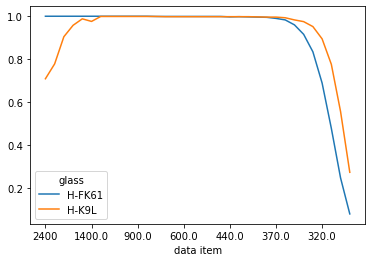

In [31]:
trns_data.plot()

<AxesSubplot:xlabel='data item'>

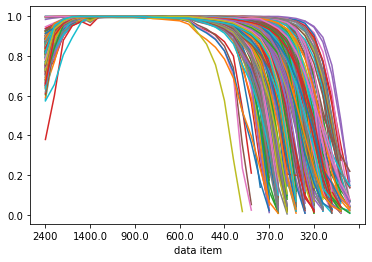

In [32]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [33]:
gla_v2 = cdgm.CDGMGlass(gname)

In [34]:
gla_v2.meas_rindex('F')

1.50123

In [35]:
gla_v2.glass_code()

'497.816'

In [36]:
gla_v2.transmission_data()

TypeError: float() argument must be a string or a number, not 'NAType'

In [ ]:
gla_v2.glass_data()['internal transmission mm, 10']

In [ ]:
gla_v2.glass_data()['internal transmission mm, 10'][2400.0]

In [ ]:
len(gla_v2.glass_data()['internal transmission mm, 10'])

In [ ]:
gla_v2.glass_data()['internal transmission mm, 10'].to_numpy(dtype=float, na_value=None)